<a href="https://colab.research.google.com/github/nhanguyenai/HomeWork-Predict/blob/main/Food5Cate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
import os

base_dir = '/content/drive/MyDrive/foodvndata' # Thay đổi nếu thư mục 'datasets' ở vị trí khác
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# In ra để kiểm tra đường dẫn
print("Đường dẫn train:", train_dir)
print("Đường dẫn validation:", validation_dir)
print("Đường dẫn test:", test_dir)

# Kiểm tra số lượng ảnh trong mỗi thư mục
for dir_path in [train_dir, validation_dir, test_dir]:
  if os.path.exists(dir_path):
    num_images = sum([len(files) for r, d, files in os.walk(dir_path) if r != dir_path])  # Loại trừ thư mục gốc
    print(f"Số lượng ảnh trong {dir_path}: {num_images}")
  else:
    print(f"Thư mục không tồn tại: {dir_path}")

Đường dẫn train: /content/drive/MyDrive/foodvndata/train
Đường dẫn validation: /content/drive/MyDrive/foodvndata/valid
Đường dẫn test: /content/drive/MyDrive/foodvndata/test
Số lượng ảnh trong /content/drive/MyDrive/foodvndata/train: 1432
Số lượng ảnh trong /content/drive/MyDrive/foodvndata/valid: 76
Số lượng ảnh trong /content/drive/MyDrive/foodvndata/test: 364


In [5]:
img_width, img_height = 150, 150 # Kích thước ảnh đầu vào
batch_size = 32
num_classes = len(os.listdir(train_dir)) # Số lượng lớp (5 loại thức ăn)

# Data augmentation cho tập huấn luyện
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Chỉ rescale cho tập validation và test
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# In ra số lượng lớp để kiểm tra
print("Số lượng lớp:", num_classes)
print("Tên các lớp:", train_generator.class_indices)

Found 1432 images belonging to 5 classes.
Found 76 images belonging to 5 classes.
Found 364 images belonging to 5 classes.
Số lượng lớp: 5
Tên các lớp: {'banh_bo': 0, 'banh_bot_loc': 1, 'banh_cong': 2, 'banh_da_lon': 3, 'banh_khot': 4}


In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax') # Số lượng output units là 5
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,455,173 (13.18 MB)

 Trainable params: 3,455,173 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
epochs = 100
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 618s 14s/step - accuracy: 0.2365 - loss: 1.6043 - val_accuracy: 0.3281 - val_loss: 1.5574
Epoch 2/100
 1/44 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3750 - loss: 1.5666

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.3750 - loss: 1.5666 - val_accuracy: 0.3125 - val_loss: 1.5564
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 935ms/step - accuracy: 0.3014 - loss: 1.5451 - val_accuracy: 0.3906 - val_loss: 1.3589
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4375 - loss: 1.3574 - val_accuracy: 0.4062 - val_loss: 1.3436
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 82s 947ms/step - accuracy: 0.4398 - loss: 1.3444 - val_accuracy: 0.3906 - val_loss: 1.2460
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5000 - loss: 1.1953 - val_accuracy: 0.4375 - val_loss: 1.2167
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 496ms/step - accuracy: 0.4748 - loss: 1.2696 - val_accuracy: 0.4688 - val_loss: 1.2053
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3750 - loss: 1.2710 - val_accuracy: 0.4531 - val_loss: 1.2186
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 504ms/step - accuracy: 0.5290 - loss: 1.1755 - val_accuracy: 0.531

In [8]:
model.save('vietnamese_food_model.h5')
print("Mô hình nhận diện thức ăn đã được lưu.")

Mô hình nhận diện thức ăn đã được lưu.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 909ms/step


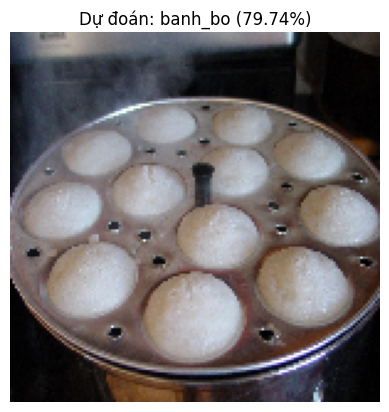

In [9]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model, img_width, img_height, class_names):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class_index]
    predicted_class_name = class_names[predicted_class_index]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Dự đoán: {predicted_class_name} ({confidence*100:.2f}%)")
    plt.show()

    return predicted_class_name, confidence

test_image_path = '/content/banh_bo464.jpg'
if os.path.exists(test_image_path):
    predicted_class, confidence = predict_image(test_image_path, model, img_width, img_height, list(train_generator.class_indices.keys()))
else:
    print(f"Không tìm thấy ảnh tại đường dẫn: {test_image_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


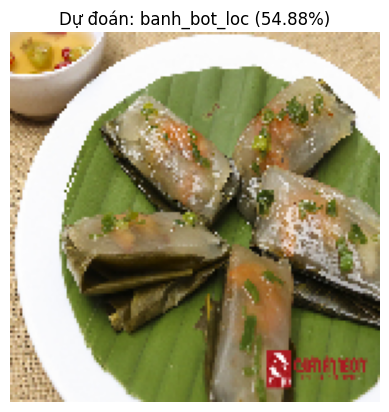

In [10]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model, img_width, img_height, class_names):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class_index]
    predicted_class_name = class_names[predicted_class_index]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Dự đoán: {predicted_class_name} ({confidence*100:.2f}%)")
    plt.show()

    return predicted_class_name, confidence

test_image_path = '/content/banh_bot_loc499.jpg'
if os.path.exists(test_image_path):
    predicted_class, confidence = predict_image(test_image_path, model, img_width, img_height, list(train_generator.class_indices.keys()))
else:
    print(f"Không tìm thấy ảnh tại đường dẫn: {test_image_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


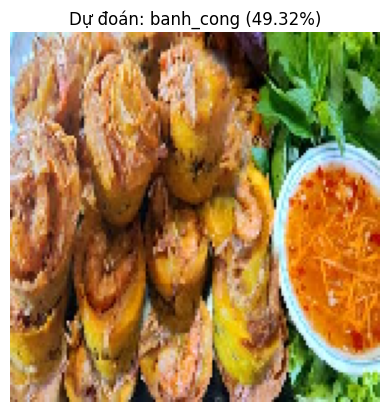

In [11]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model, img_width, img_height, class_names):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class_index]
    predicted_class_name = class_names[predicted_class_index]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Dự đoán: {predicted_class_name} ({confidence*100:.2f}%)")
    plt.show()

    return predicted_class_name, confidence

test_image_path = '/content/banh_cong301.jpg'
if os.path.exists(test_image_path):
    predicted_class, confidence = predict_image(test_image_path, model, img_width, img_height, list(train_generator.class_indices.keys()))
else:
    print(f"Không tìm thấy ảnh tại đường dẫn: {test_image_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


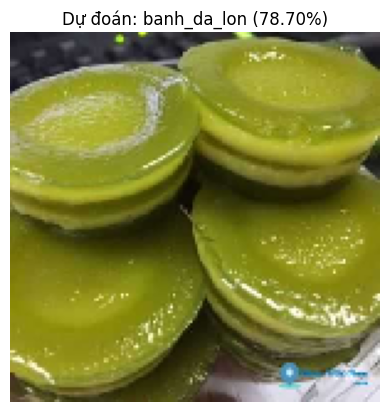

In [12]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model, img_width, img_height, class_names):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class_index]
    predicted_class_name = class_names[predicted_class_index]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Dự đoán: {predicted_class_name} ({confidence*100:.2f}%)")
    plt.show()

    return predicted_class_name, confidence

test_image_path = '/content/banh_da_lon419.jpg'
if os.path.exists(test_image_path):
    predicted_class, confidence = predict_image(test_image_path, model, img_width, img_height, list(train_generator.class_indices.keys()))
else:
    print(f"Không tìm thấy ảnh tại đường dẫn: {test_image_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


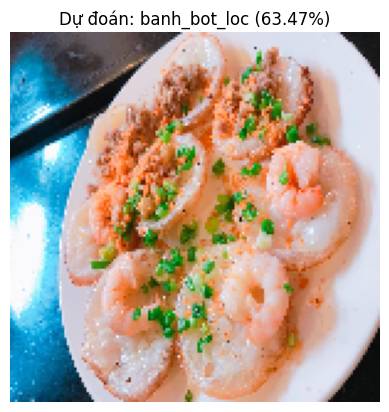

In [13]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model, img_width, img_height, class_names):
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    confidence = predictions[0][predicted_class_index]
    predicted_class_name = class_names[predicted_class_index]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Dự đoán: {predicted_class_name} ({confidence*100:.2f}%)")
    plt.show()

    return predicted_class_name, confidence

test_image_path = '/content/banh_khot328.jpg'
if os.path.exists(test_image_path):
    predicted_class, confidence = predict_image(test_image_path, model, img_width, img_height, list(train_generator.class_indices.keys()))
else:
    print(f"Không tìm thấy ảnh tại đường dẫn: {test_image_path}")